In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = fetch_california_housing () # load the datsets from sklearn
data
df =pd.DataFrame(data.data,columns=data.feature_names) # converting datasets into dataframe uisng pandas
df
df['Target'] = data.target # for adding target column
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [9]:
df.shape

(20640, 9)

In [11]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

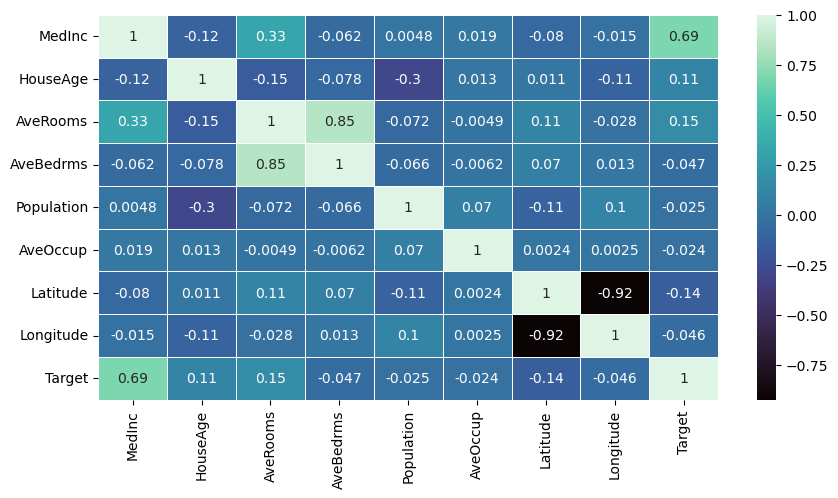

In [13]:
# finding the correlation beteen features, for finding metrics # Correlation metrics is used for filter the method in countinuous data.
corr = df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(data=corr,annot= True,cmap = 'mako',linewidth = 0.5)
plt.show()

In [15]:
x= df[['MedInc','HouseAge','AveRooms']]
y= df['Target']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [19]:
# Scaling
scaler = StandardScaler()
x_train_scaled =scaler.fit_transform(x_train) # fitting the scaler for training data
x_test_scaled = scaler.transform(x_test) # transforming the same scaler
print( 'Train the data',x_train_scaled)
print('Testing the data',x_test_scaled)
                        
 

Train the data [[-0.326196    0.34849025 -0.17491646]
 [-0.03584338  1.61811813 -0.40283542]
 [ 0.14470145 -1.95271028  0.08821601]
 ...
 [-0.49697313  0.58654547 -0.60675918]
 [ 0.96545045 -1.07984112  0.40217517]
 [-0.68544764  1.85617335 -0.85144571]]
Testing the data [[-1.15508475 -0.28632369 -0.52068576]
 [-0.70865905  0.11043502 -0.16581537]
 [-0.21040155  1.85617335 -0.61076476]
 ...
 [ 2.80902421 -0.28632369  0.75501156]
 [-0.57542978  0.58654547 -0.06124296]
 [-0.17259111 -0.92113763 -0.6058703 ]]


In [233]:
# Linear Regression
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()
l_model.fit(x_train_scaled,y_train)
y_predict  =l_model.predict(x_test_scaled)

y_predict

array([1.06791912, 1.50634095, 2.32862562, ..., 4.33948872, 1.71316594,
       1.77105121])

In [107]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

In [109]:
evaluate_model(y_test, y_predict, 'Linear Regression')

Linear Regression Performance:
MAE: 0.6033213567335045
MSE: 0.6589108649336336
R2 Score: 0.49717158850807075




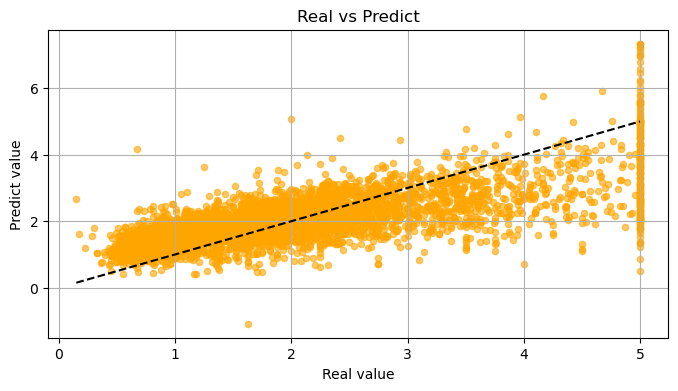

In [197]:
# Explain through visualization
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict,color ='orange',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [235]:
# Decison tree
from sklearn.tree import DecisionTreeRegressor
dtr_model=DecisionTreeRegressor(random_state=42)
dtr_model.fit(x_train_scaled,y_train)
y_predict_dtr = dtr_model.predict(x_test_scaled)
y_predict


array([1.06791912, 1.50634095, 2.32862562, ..., 4.33948872, 1.71316594,
       1.77105121])

In [237]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

In [239]:
evaluate_model(y_test, y_predict_dtr, 'Decision Tree')

Decision Tree Performance:
MAE: 0.7537549103682172
MSE: 1.1059732453979407
R2 Score: 0.1560091057353672




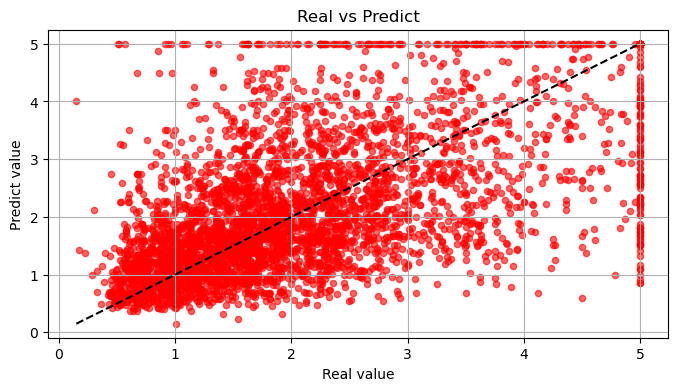

In [241]:
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_dtr,color ='red',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [243]:
#Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100,random_state = 42)
rfr_model.fit(x_train_scaled,y_train)
y_predict_rfr=rfr_model.predict(x_test_scaled)
y_predict_rfr


array([1.16586  , 1.00205  , 3.165403 , ..., 4.9415993, 1.79787  ,
       2.7163604])

In [245]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

In [247]:
evaluate_model(y_test, y_predict_rfr,'Random Forest Regressor')

Random Forest Regressor Performance:
MAE: 0.5607577252422481
MSE: 0.5979884180740271
R2 Score: 0.5436627587237917




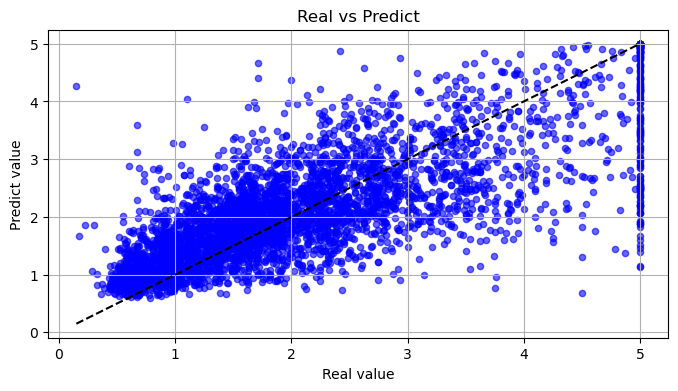

In [249]:
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_rfr,color ='blue',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [251]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(n_estimators=100,random_state=42)
gbr_model.fit(x_train_scaled,y_train)
y_predict_gbr=gbr_model.predict(x_test_scaled)
y_predict_gbr

array([1.09370959, 1.17417681, 3.23475849, ..., 4.67699504, 1.19997733,
       2.32989439])

In [253]:
def evaluate_model(y_test,y_pred,model_name):
    print(f"{model_name}:Performance")
    print("MAE:",mean_absolute_error(y_test,y_pred))
    print("MSE:",mean_squared_error(y_test,y_pred))
    print("R2_score:",r2_score(y_test,y_pred))
    print("\n")

In [255]:
evaluate_model(y_test,y_predict_gbr,"Gradient Boosting Regressor")

Gradient Boosting Regressor:Performance
MAE: 0.5347370456021675
MSE: 0.5538501108625231
R2_score: 0.5773456073187055




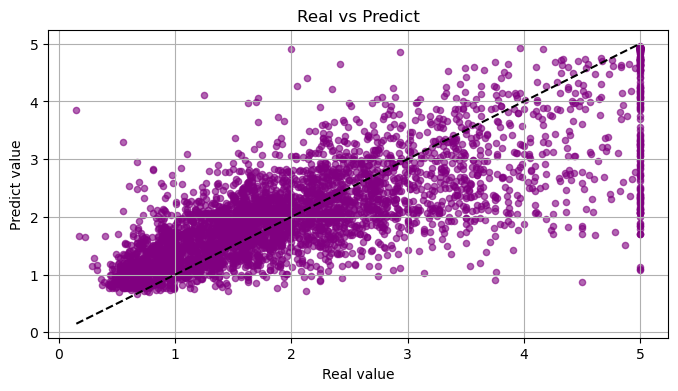

In [257]:
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_gbr,color ='purple',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

In [259]:
#Support Vector Regressor (SVR)
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(x_train_scaled,y_train)
y_predict_svr=svr_model.predict(x_test_scaled)
y_predict_svr

array([0.9096963 , 1.07863319, 2.89218682, ..., 4.73451553, 1.14928262,
       2.11609689])

In [261]:
def evaluate_model(y_test,y_pred,model_name):
    print(f"{model_name} Performance:")
    print("MAE:",mean_absolute_error(y_test,y_pred))
    print("MSE:",mean_squared_error(y_test,y_pred))
    print("R2_square:",r2_score(y_test,y_pred))
    print("\n")

In [263]:
evaluate_model(y_test,y_predict_svr,"Support Vector Regressor (SVR)")

Support Vector Regressor (SVR) Performance:
MAE: 0.520663640356173
MSE: 0.570474622099303
R2_square: 0.564659101416482




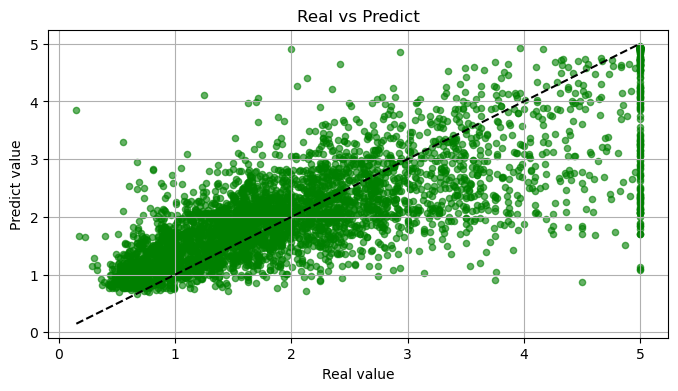

In [277]:
plt.figure(figsize=(8,4))
plt.scatter( x=y_test,y=y_predict_gbr,color ='green',alpha=0.6,s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.grid(True)
plt.title('Real vs Predict')
plt.xlabel('Real value')
plt.ylabel('Predict value')
plt.show()

 3 Comparison 

In [304]:
# Best performing algorithm
print(" Comparison (MAE):")
print("Linear Regression:", mean_absolute_error(y_test, y_predict))
print("decision tree:", mean_absolute_error(y_test, y_predict_dtr))
print("Random Forest:", mean_absolute_error(y_test, y_predict_rfr))
print("Gradient Boosting:", mean_absolute_error(y_test, y_predict_gbr))
print("SVR:", mean_absolute_error(y_test, y_predict_svr))

 Comparison (MAE):
Linear Regression: 0.6033213567335047
decision tree: 0.7537549103682172
Random Forest: 0.5607577252422481
Gradient Boosting: 0.5347370456021675
SVR: 0.520663640356173
